<a href="https://colab.research.google.com/github/mart-anthony-stark/Machine-Learning-and-Deep-Learning/blob/main/MRI_Brain_Tumor_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Brain Tumor Detection
kaggle dataset: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection?resource=download

In [1]:
! unzip Brain\ Tumor.zip

Archive:  Brain Tumor.zip
   creating: Brain Tumor/
   creating: Brain Tumor/no/
  inflating: Brain Tumor/no/1 no.jpeg  
  inflating: Brain Tumor/no/10 no.jpg  
  inflating: Brain Tumor/no/11 no.jpg  
  inflating: Brain Tumor/no/12 no.jpg  
  inflating: Brain Tumor/no/13 no.jpg  
  inflating: Brain Tumor/no/14 no.jpg  
  inflating: Brain Tumor/no/15 no.jpg  
  inflating: Brain Tumor/no/17 no.jpg  
  inflating: Brain Tumor/no/18 no.jpg  
  inflating: Brain Tumor/no/19 no.jpg  
  inflating: Brain Tumor/no/2 no.jpeg  
  inflating: Brain Tumor/no/20 no.jpg  
  inflating: Brain Tumor/no/21 no.jpg  
  inflating: Brain Tumor/no/22 no.jpg  
  inflating: Brain Tumor/no/23 no.jpg  
  inflating: Brain Tumor/no/24 no.jpg  
  inflating: Brain Tumor/no/25 no.jpg  
  inflating: Brain Tumor/no/26 no.jpg  
  inflating: Brain Tumor/no/27 no.jpg  
  inflating: Brain Tumor/no/28 no.jpg  
  inflating: Brain Tumor/no/29 no.jpg  
  inflating: Brain Tumor/no/3 no.jpg  
  inflating: Brain Tumor/no/30 no.jpg  


## Import dataset and packages

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt
import time
from os import listdir

In [6]:
def crop_contour_img(image, plot=False):
  # Convert to grayscale
  grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  grayscale = cv2.GaussianBlur(grayscale, (5,5), 0)
  
  # Remove noises of the image
  threshold_image = cv2.threshold(grayscale, 45, 255, cv2.THRESH_BINARY)[1]
  threshold_image = cv2.erode(threshold_image, None, iterations=2)
  threshold_image = cv2.dilate(threshold_image, None, iterations=2)

  # Detect the contours of the image
  contour = cv2.findContours(threshold_image.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  contour = imutils.grab_contours(contour)
  c = max(contour, key=cv2.contourArea)

  extreme_pnts_left = tuple(c[c[:, :, 0].argmin()][0])
  extreme_pnts_right = tuple(c[c[:, :, 0].argmax()][0])
  extreme_pnts_top = tuple(c[c[:, :, 1].argmin()][0])
  extreme_pnts_bot = tuple(c[c[:, :, 1].argmax()][0])

  new_image = image[extreme_pnts_top[1]:extreme_pnts_bot[1], extreme_pnts_left[0]:extreme_pnts_right[0]]

  if plot:
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(image)

    plt.tick_params(axis='both', which='both',
                    top=False, bottom=False, left=False, right=False, labelbottom=False,
                    labeltop=False, labelleft=False, labelright=False)
    plt.title('Original Image')
    plt.subplot(1,2,2)
    plt.imshow(new_image)
    plt.tick_params(axis='both', which='both',
                    top=False, bottom=False, left=False, right=False, labelbottom=False,
                    labeltop=False, labelleft=False, labelright=False)
    plt.title('Cropped Image')
    plt.show()

    return new_image


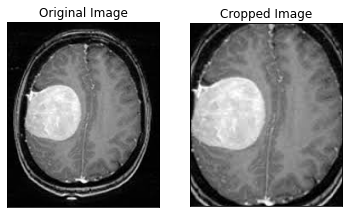

In [7]:
example_image = cv2.imread('Brain Tumor/yes/Y1.jpg')
example_new_imae = crop_contour_img(example_image, True)